# SYNCLUS results within MDS

In [1]:
from scripts.ClusterTS_MDS import ClusterMDS
from numpy import loadtxt, float64
from sklearn.metrics import rand_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, v_measure_score

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = loadtxt("../data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 65 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid si

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.108371


np.float64(0.10837084444076146)

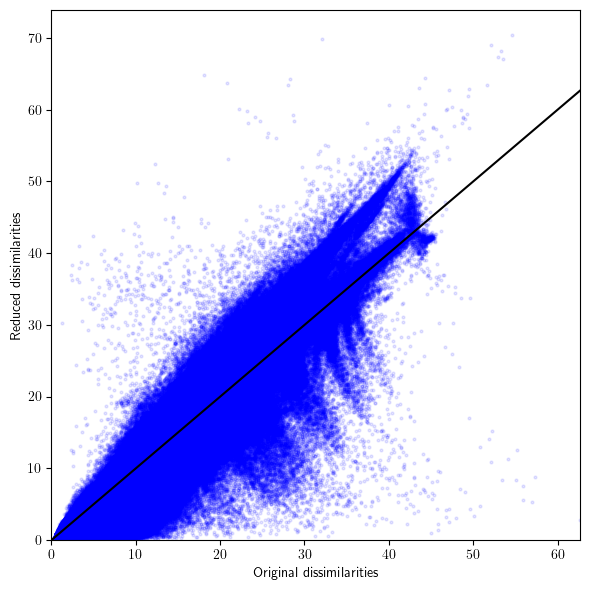

In [3]:
TEC_ClusterSeries = ClusterMDS(dissimilarity = PTEX_dissim)
TEC_ClusterSeries.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 2000, eps = 1e-6, verbose = 0)

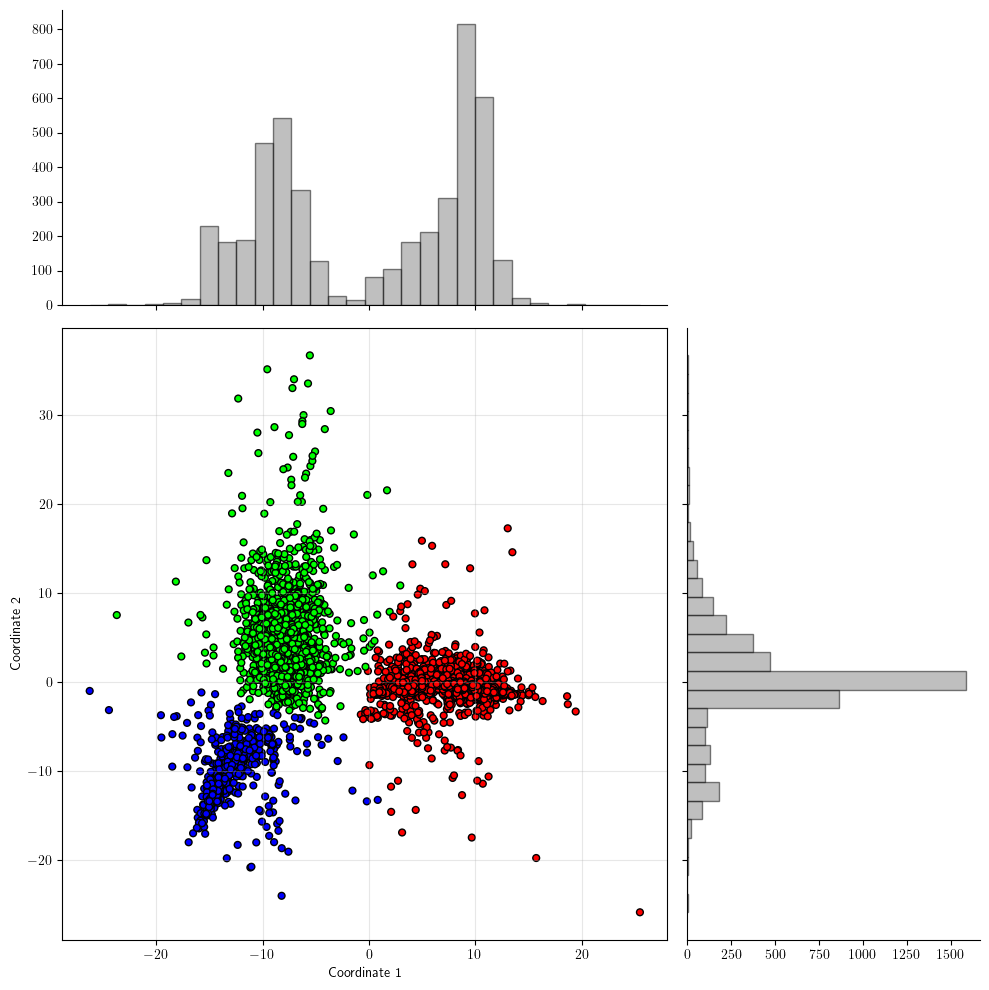

In [4]:
TEC_ClusterSeries.ClusterTSVectors(num_clusters = 3, cluster_method = "K-Means")
TEC_ClusterSeries.VisualizeClustering()

In [5]:
MDS_Labels = TEC_ClusterSeries.Xc_Labels
SYNCLUS_Labels = loadtxt("../data/PTEX_SYNCLUS_Labels.dat", dtype = int).flatten()

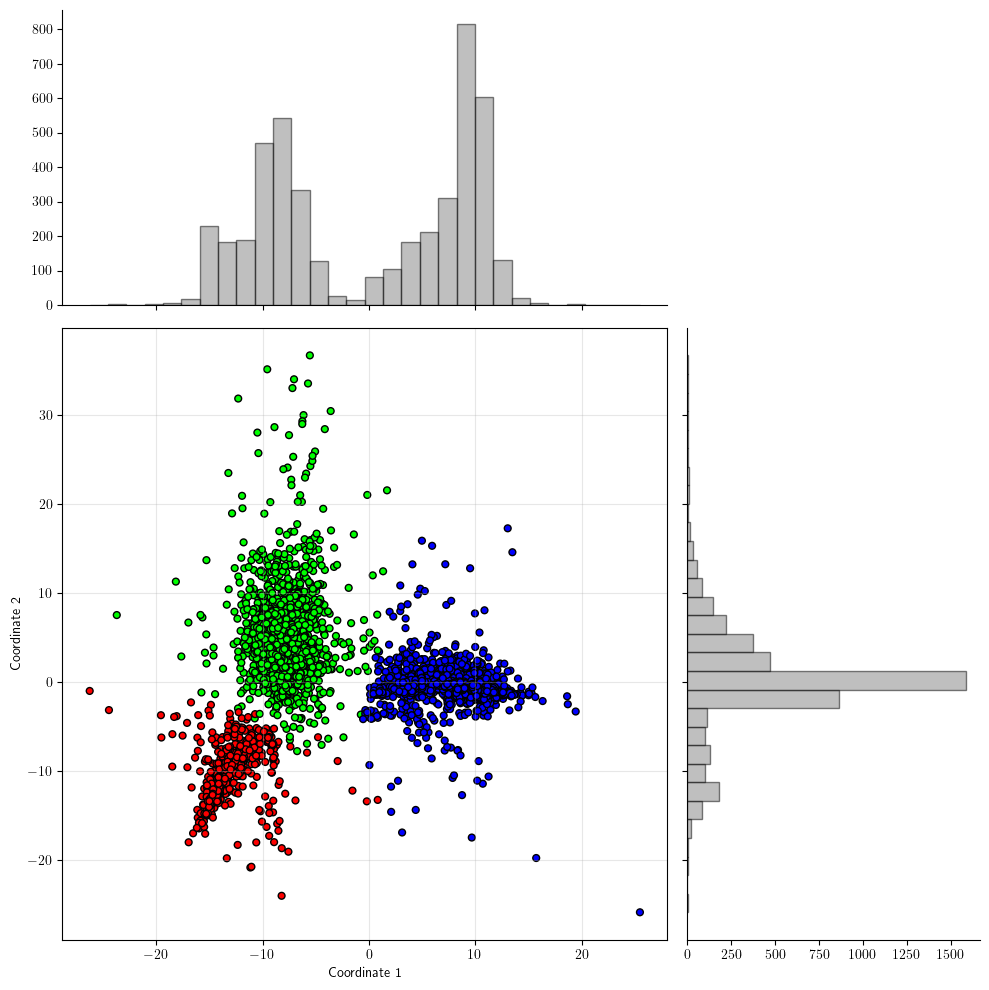

In [6]:
TEC_ClusterSeries.VisualizeClustering(Labels = SYNCLUS_Labels)

In [7]:
Rand_MDS_SYNCLUS = rand_score(MDS_Labels, SYNCLUS_Labels)
AdjRand_MDS_SYNCLUS = adjusted_rand_score(MDS_Labels, SYNCLUS_Labels)
NMI_MDS_SYNCLUS = normalized_mutual_info_score(MDS_Labels, SYNCLUS_Labels)
AMI_MDS_SYNCLUS = adjusted_mutual_info_score(MDS_Labels, SYNCLUS_Labels)
VMeas_MDS_SYNCLUS = v_measure_score(MDS_Labels, SYNCLUS_Labels)

In [8]:
print("Rand Index = ", Rand_MDS_SYNCLUS)
print("Adjusted Rand Index = ", AdjRand_MDS_SYNCLUS)
print("NMI = ", NMI_MDS_SYNCLUS)
print("AMI = ", AMI_MDS_SYNCLUS)
print("V-Measure = ", VMeas_MDS_SYNCLUS)

Rand Index =  0.9931220438213872
Adjusted Rand Index =  0.9858121753006063
NMI =  0.9654629057937614
AMI =  0.9654474654606237
V-Measure =  0.9654629057937614
